In [177]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import random
import math
from PIL import Image

from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

from sklearn.metrics import mean_squared_error 
import cv2

In [178]:
def get_Noise(img,d): #getting salt and paper noise
    #return skimage.util.random_noise(img, mode='s&p', amount=d)
    paper=d
    salt=1-d
    row, col=img.shape
    #row, col=img.size

    g=np.matrix(img).reshape(row, col)
    for i in range(row):
        for j in range(col):
            ran=np.random.random()
            if ran<paper:
                g[i,j]=0
            elif ran>salt:
                g[i,j]=255
            else:
                g[i,j]=img[i,j]
    return g

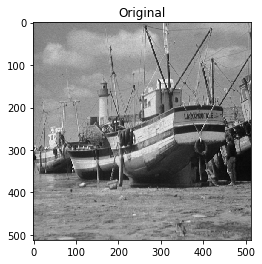

In [179]:
img=imread(r'C:\Users\Biswarup Mistry\Desktop\Misc\1.tiff')
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.title('Original')
plt.show()

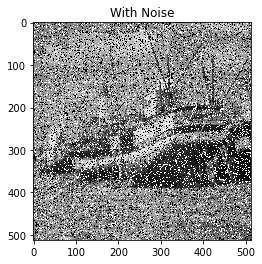

In [180]:
d=0.15
noise_img=get_Noise(img,d)
plt.imshow(noise_img, cmap=plt.cm.gray, interpolation='nearest')
plt.title('With Noise')
plt.show()

In [181]:
def mse(image1,image2):
    #Y = 
    return np.square(np.subtract(image1,image2)).mean() #Correct MSE
    #print("MSE : ", Y)

In [182]:
def psnr(I1,I2):
    r=255.0
    MSE=mse(I1,I2)
    print('MSE : ',MSE)
    return 10*np.log10(np.square(r)/MSE) #Correct PSNR


In [183]:
PSNR=psnr(img,noise_img)
PSNR=round(PSNR, 6)
print('PSNR : ',PSNR)

MSE :  32.244911193847656
PSNR :  33.046192


In [184]:
print('MSE with SKlearn : ',mean_squared_error(img,noise_img))

MSE with SKlearn :  32.244911193847656


C:\Users\Biswarup Mistry\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
